Check the descriptive statistics of the dataset

Visualize some of those columns and find out if you observe any pattern

Find the correlation in the data and visualize it

Visualize the frequency of the output categories

Apply the KNN Algorithm to the dataset without applying scaling operation and try to compare the results before scaling and after scaling.

[Dataset Link]('https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/wbcd.csv')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/wbcd.csv")
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,911320502,B,13.17,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.02870,...,14.90,23.89,95.10,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925
565,898677,B,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,...,10.88,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488
566,873885,M,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,...,17.80,28.03,113.80,973.1,0.1301,0.3299,0.36300,0.12260,0.3175,0.09772
567,911201,B,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,...,15.80,16.93,103.10,749.9,0.1347,0.1478,0.13730,0.10690,0.2606,0.07810


In [3]:
data.isnull().sum()

id                   0
diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
points_mean          0
symmetry_mean        0
dimension_mean       0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
points_se            0
symmetry_se          0
dimension_se         0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
points_worst         0
symmetry_worst       0
dimension_worst      0
dtype: int64

#### Descriptive statistics of the dataset


In [4]:
# Descriptive statistics of the dataset
data1=data.drop(columns=['id'])
data1.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


#### Visualize some of those columns and find out if you observe any pattern


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019A8FABFF88>,
      dtype=object)

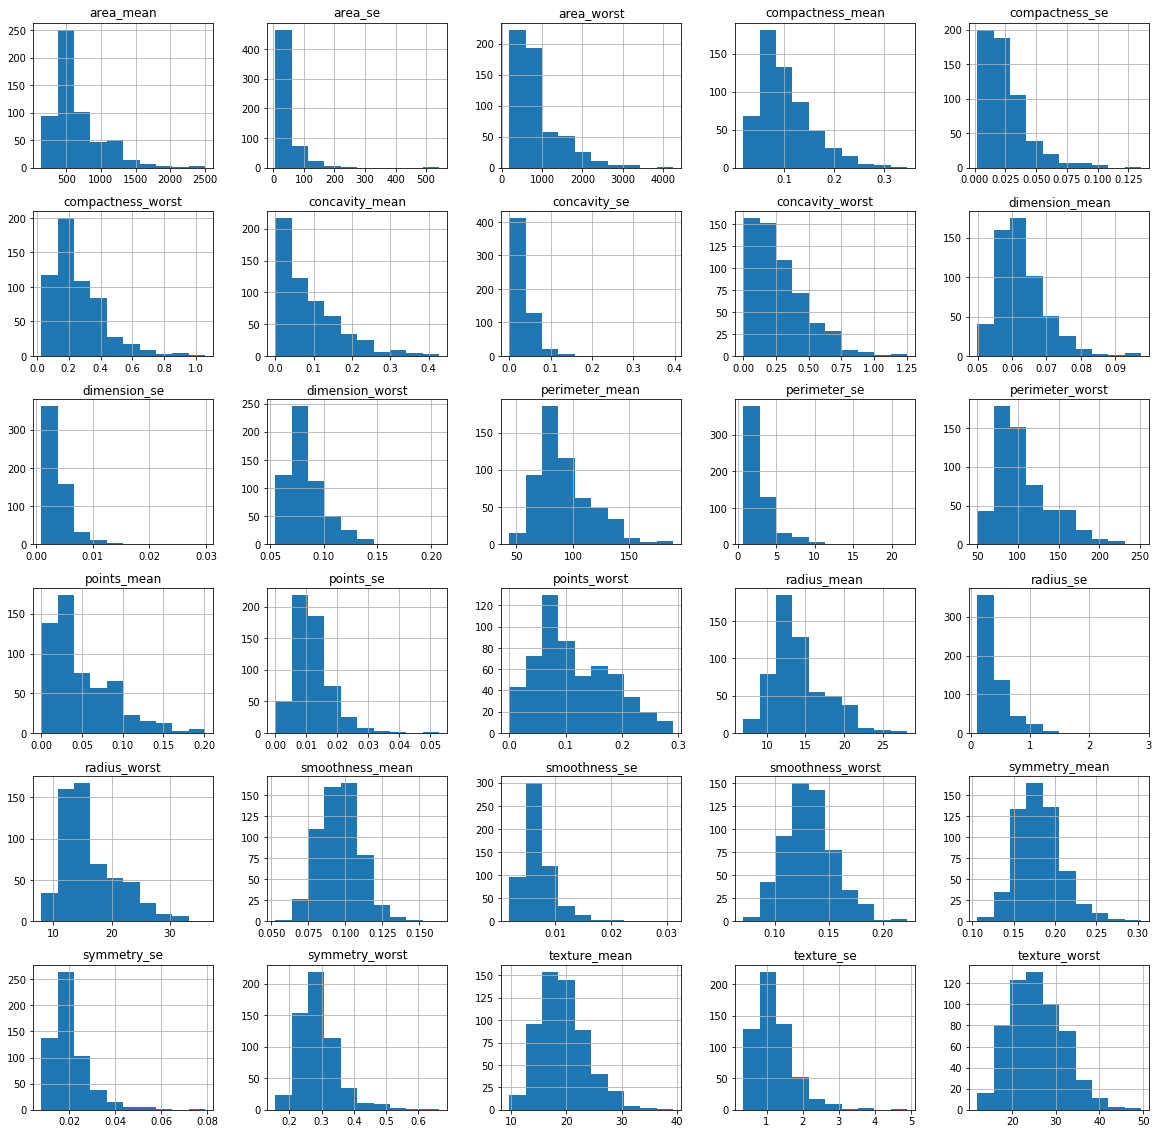

In [5]:
# Visualize some of those columns and find out if you observe any pattern
# Histogram
data1.hist(figsize=(20,20))

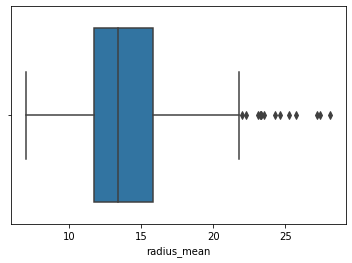

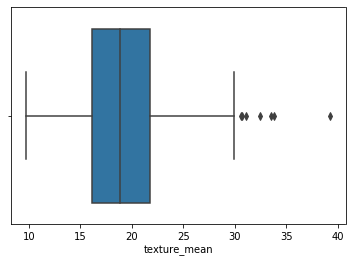

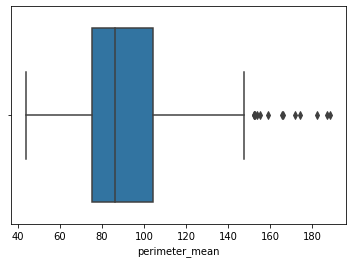

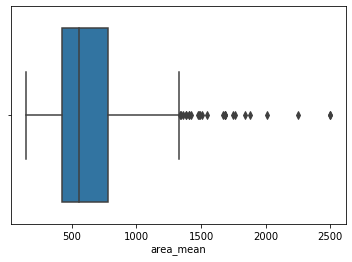

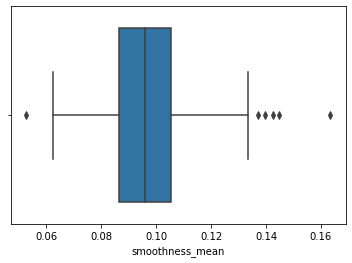

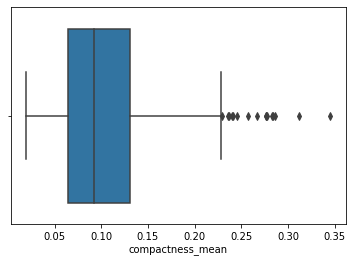

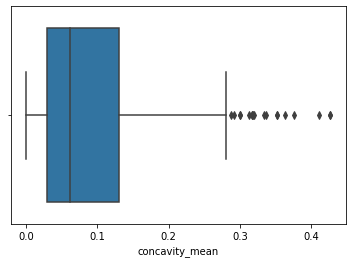

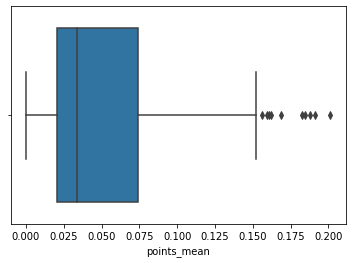

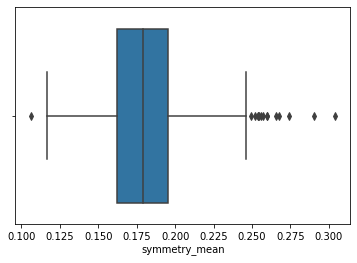

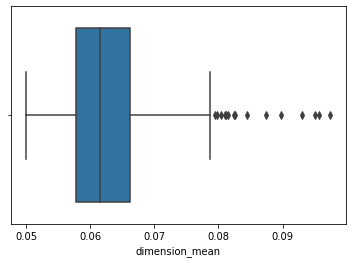

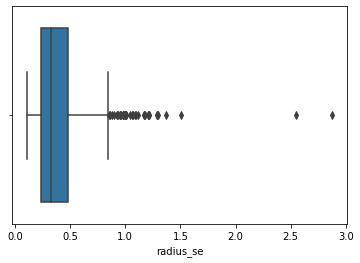

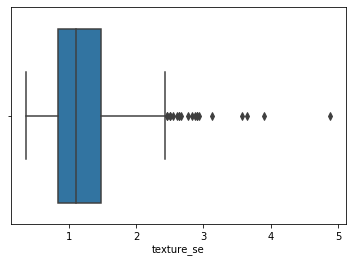

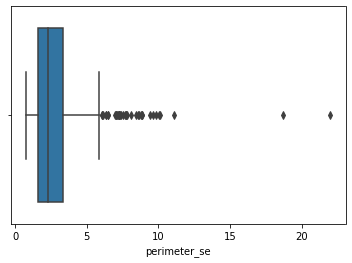

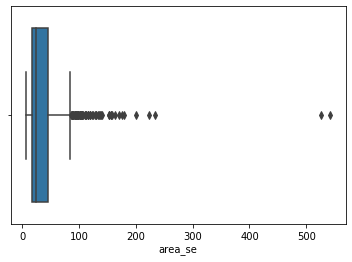

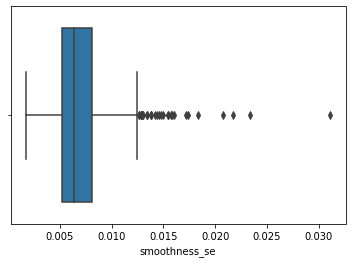

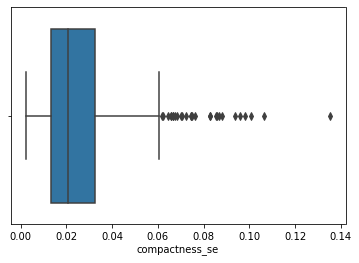

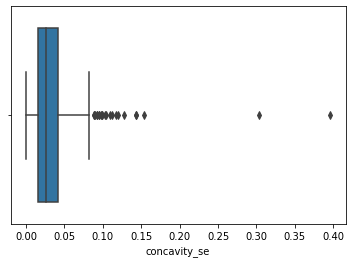

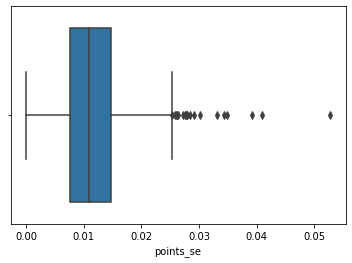

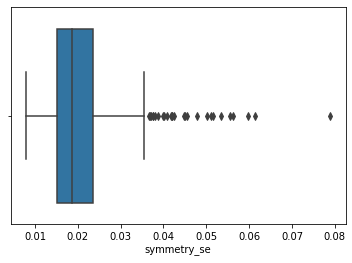

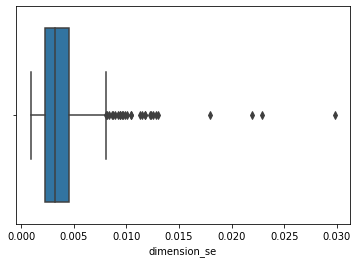

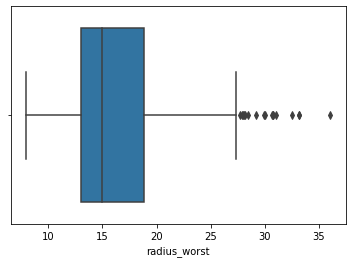

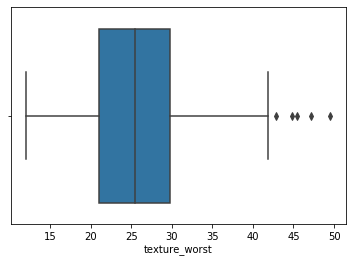

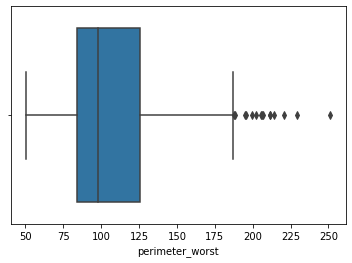

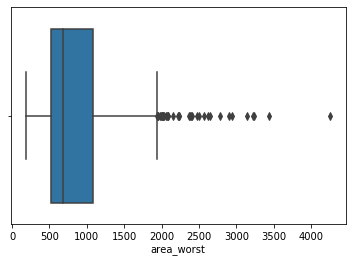

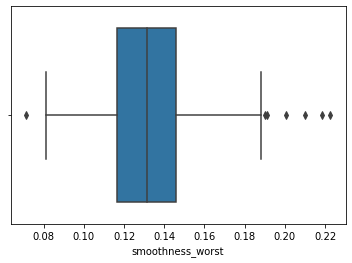

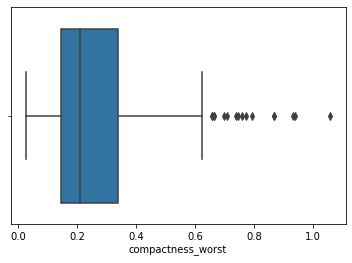

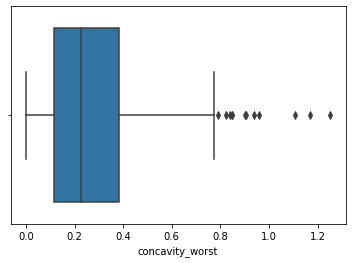

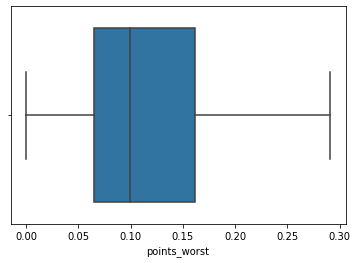

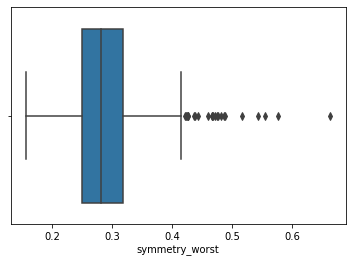

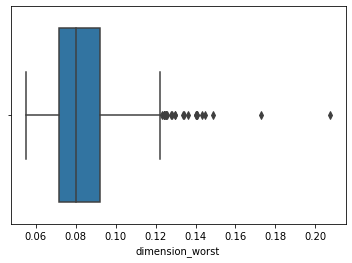

In [6]:
# Boxplot
for i in data1.select_dtypes(include=['int64','float64']).columns:
    sns.boxplot(data1[i])
    plt.show()

#### Find the correlation in the data and visualize it 


In [7]:
# Find the correlation in the data and visualize it 
data1.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


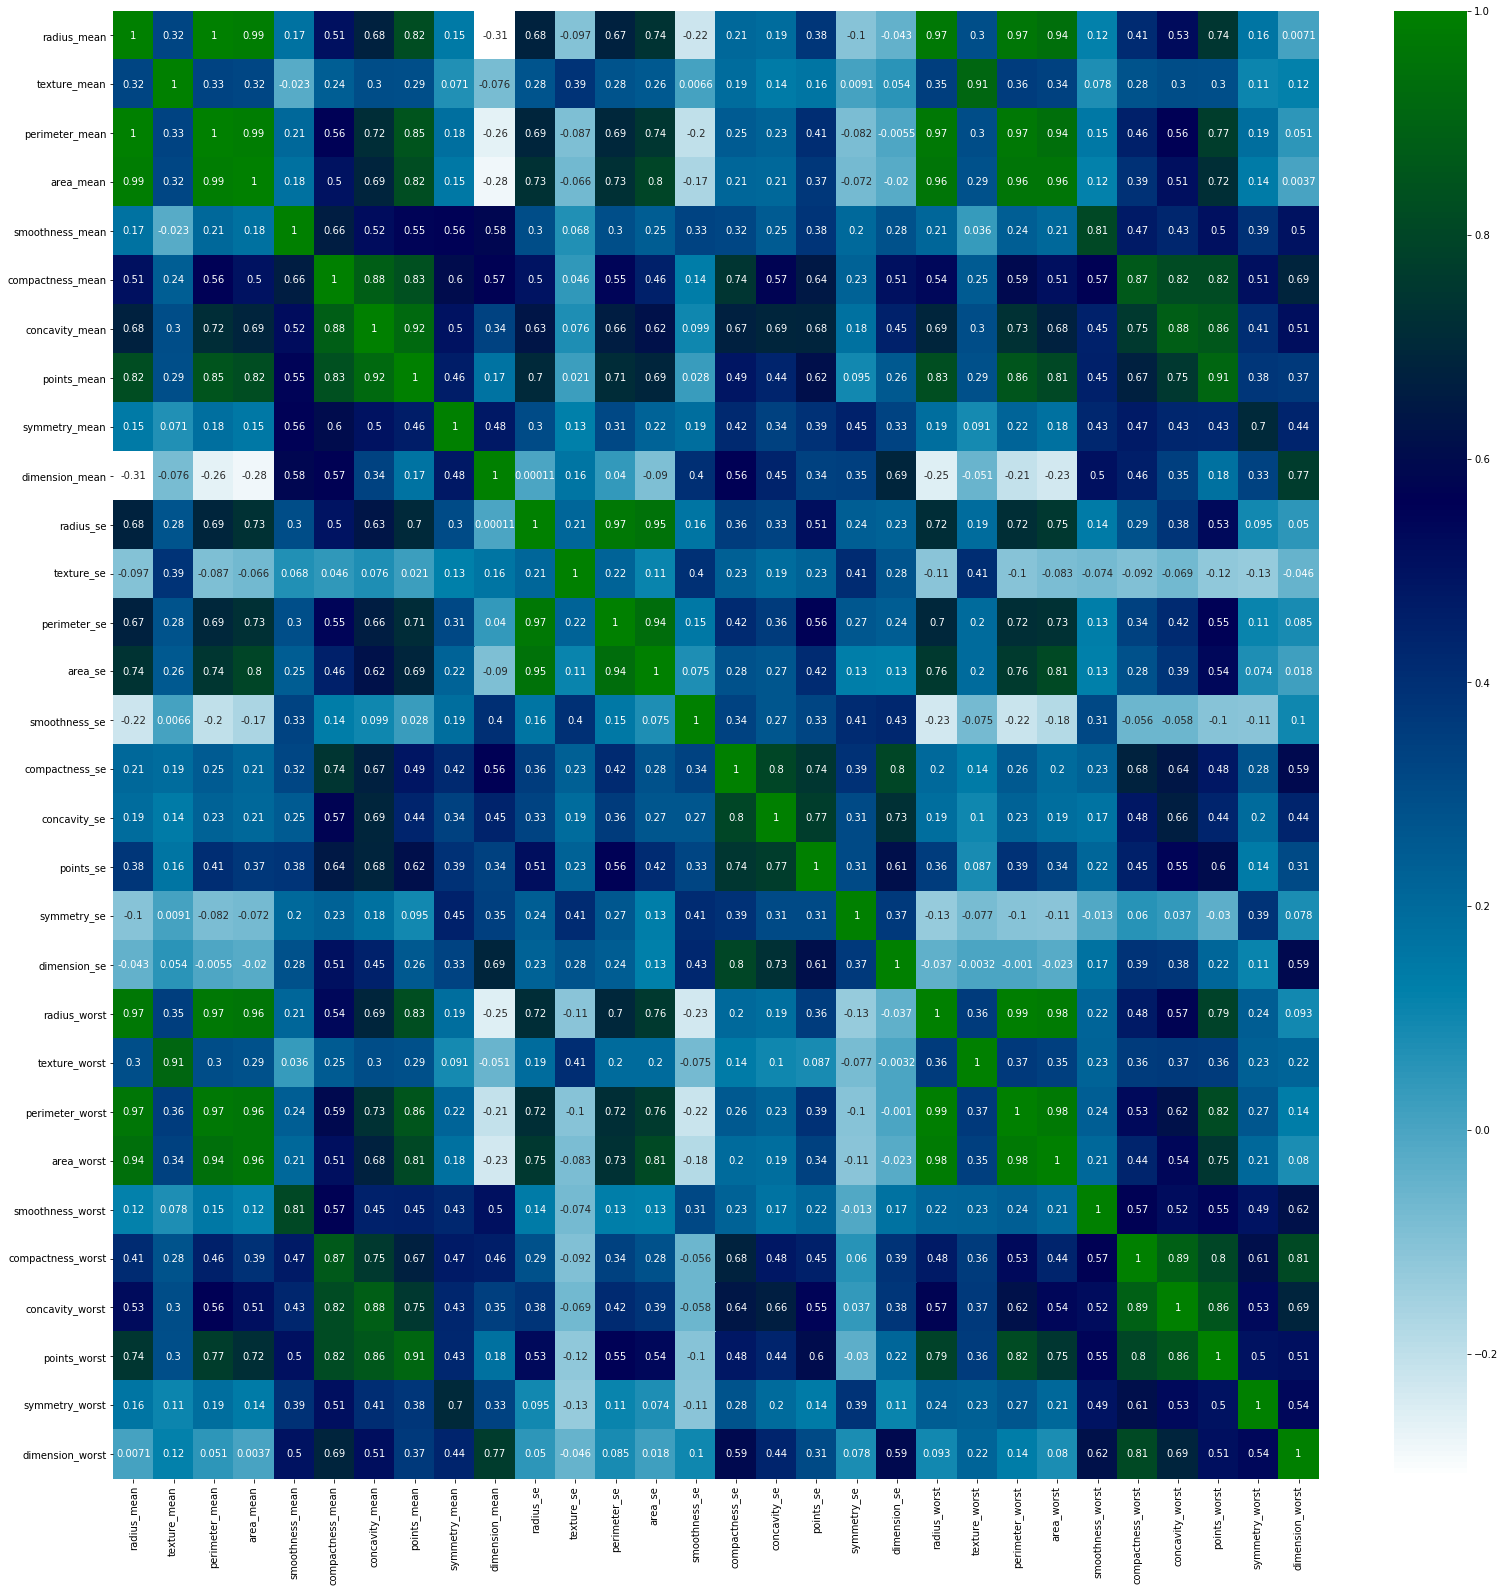

In [16]:
plt.figure(figsize=(27,27))
sns.heatmap(data1.corr(),annot=True,cmap='ocean_r')

#### Visualize the frequency of the output categories


In [17]:
# Visualize the frequency of the output categories
data['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

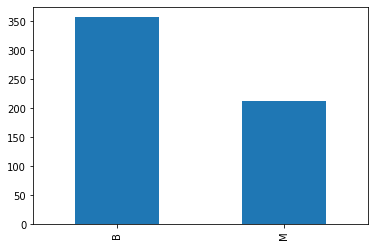

In [18]:
data['diagnosis'].value_counts().plot(kind='bar')


Majority of the people have Benign Tumour

#### Apply the KNN Algorithm to the dataset without applying scaling operation and try to compare the  results before scaling and after scaling.

In [19]:
# Apply the KNN Algorithm to the dataset without applying scaling operation and try to compare the 
# results before scaling and after scaling.
X = data.drop(['id','diagnosis'],axis=1)
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [20]:
y = data.diagnosis
y.head()

0    B
1    B
2    B
3    B
4    B
Name: diagnosis, dtype: object

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=2)

In [22]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(398, 30)
(171, 30)
(398,)
(171,)


#### With Scaling

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Scaling for training data
scaled_X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
scaled_X_train


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,0.065483,-1.355186,0.031346,-0.035592,0.240960,-0.482979,-0.357708,-0.046272,1.043490,-1.165341,...,0.125178,-1.425939,0.117536,0.004168,-0.067496,-0.603330,-0.480560,-0.046890,0.368300,-1.228067
1,-0.776400,-0.122579,-0.771922,-0.735368,0.647407,-0.311306,-0.538400,-0.554964,0.487938,-0.040111,...,-0.762720,-0.388938,-0.811034,-0.683149,0.750316,-0.570666,-0.484590,-0.398686,0.364807,-0.836490
2,-0.849363,-1.057826,-0.875635,-0.787151,0.348139,-0.852027,-0.784787,-0.557750,-0.867159,0.635322,...,-0.993986,-1.439473,-1.023193,-0.826151,-0.423640,-1.070632,-1.104405,-1.038808,-1.657467,-0.544597
3,-0.495772,1.855828,-0.430686,-0.494085,0.543011,0.675764,0.293648,-0.056654,0.547997,1.030554,...,-0.106089,2.370196,-0.140978,-0.177502,2.078160,1.517193,0.926643,0.515256,0.635492,2.064263
4,-0.540673,-1.208904,-0.589306,-0.538871,-1.270688,-1.348603,-0.942352,-1.083888,-0.465510,-0.868918,...,-0.684254,-1.498682,-0.738234,-0.623056,-1.368960,-1.264486,-1.095436,-1.409643,-0.974644,-1.247343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,0.601481,0.093248,0.734561,0.453131,0.487333,1.735231,1.756211,1.116199,1.328773,0.501121,...,0.253200,-0.385555,0.465193,0.119998,0.284251,1.354538,1.668284,0.992779,0.815366,0.459404
394,1.594903,1.438564,1.572400,1.506153,0.410777,1.138790,2.148854,1.697561,1.520214,-0.184636,...,1.335196,1.395787,1.255592,1.250953,-0.164226,0.953898,1.555425,0.927800,0.792663,0.089857
395,-0.883038,-0.359988,-0.852045,-0.807025,0.088542,-0.065471,-0.416287,-0.505842,-0.668211,0.250414,...,-0.938234,0.199767,-0.891856,-0.806991,0.508490,0.053292,-0.233178,-0.199365,-0.981629,-0.013132
396,1.078548,0.213151,0.913517,0.918342,-0.805780,-0.659950,-0.158337,0.205162,1.246191,-1.789158,...,0.911896,0.423069,0.676164,0.679640,-1.056784,-0.818649,-0.169695,0.101202,3.546658,-1.206588


#### Scaling for testing data
#### Testing the data based on training data


In [24]:
# Scaling for testing data
# Testing the data based on training data
scaled_X_test = pd.DataFrame(scaler.fit_transform(X_test),columns=X_test.columns)
scaled_X_test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,-0.820383,-0.173809,-0.864054,-0.772484,-0.839113,-1.115846,-0.895059,-0.803603,0.581700,-0.557191,...,-0.867791,-0.052852,-0.896889,-0.798979,-1.019902,-1.079349,-1.007702,-0.923140,0.358435,-0.918749
1,-0.141927,-0.792820,-0.198179,-0.230883,-1.152495,-0.871458,-0.875741,-0.842076,0.091697,-0.935263,...,-0.349774,-0.954952,-0.300309,-0.418776,-1.077035,-0.417112,-0.746220,-0.800681,0.438508,-0.516902
2,1.127255,-0.621604,1.062181,0.984540,-0.660692,0.192327,0.150940,0.302088,-0.436534,-0.788529,...,0.807410,-0.679606,0.724717,0.699342,-0.382650,-0.081638,0.551709,0.505600,-0.249256,-0.219070
3,-0.981224,0.993971,-1.003433,-0.874237,-1.236369,-0.830667,-0.999770,-1.171264,0.453118,-0.064110,...,-0.727843,0.754930,-0.758478,-0.715669,-0.641946,-0.689611,-1.066559,-1.382204,0.061024,-0.559531
4,0.574547,-1.058424,0.501265,0.422529,-0.242850,-0.490922,-0.513499,-0.165548,-0.384406,-0.662945,...,0.249706,-1.050791,0.202296,0.080185,-0.633156,-0.637230,-0.321219,-0.128562,-0.340767,-0.908518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,-0.916888,-0.625994,-0.917171,-0.839925,0.729320,-0.615620,-0.815449,-0.720426,-0.457386,-0.048247,...,-0.857347,-0.007215,-0.877674,-0.777207,0.083204,-0.778482,-0.869224,-0.731329,-0.026197,-0.414593
167,-0.109758,-0.854282,-0.088121,-0.216093,0.195580,0.278202,-0.231850,-0.018971,-0.638096,0.250510,...,0.011585,-0.856071,0.034161,-0.163628,0.267788,0.433932,-0.114450,0.268179,-0.611011,0.960324
168,-0.694635,-0.531606,-0.732749,-0.666293,-0.553944,-0.896863,-0.839197,-0.948554,0.004817,-0.472587,...,-0.640114,-0.303858,-0.695427,-0.614186,-0.466152,-0.634876,-0.700811,-1.055439,-0.339337,-0.278182
169,2.215126,0.287157,2.328490,2.466473,-0.314523,1.496564,1.510580,1.555440,-0.433059,-0.241249,...,2.438746,0.257482,2.604231,2.664237,-0.343096,1.130187,1.220513,0.983564,-0.262125,0.140716


#### Model Building

In [25]:
# Model Building
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6,metric='euclidean')
#knn = KNeighborsClassifier(n_neighbors=25,metric='euclidean')
#knn = KNeighborsClassifier(n_neighbors=40,metric='euclidean')
# Apply the knn object on the dataset
# Syntax: objectName.fit(Input,Output)
knn.fit(scaled_X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

#### Without Scaling


In [26]:
# Without Scaling
knn1 = KNeighborsClassifier(n_neighbors=6,metric='euclidean')
knn1.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')

#### Predictions on the data


In [27]:
# Predictions on the data
#predict function--> gives the predicted values
# Syntax:objectname.predict(Input)
y_train_pred = knn.predict(scaled_X_train)
y_train_pred

array(['B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M',
       'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B',
       'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B',
       'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M

In [28]:
#Without Scaling
y_train_pred1 = knn1.predict(X_train)
y_train_pred1

array(['B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'B',
       'M', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M',
       'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B',
       'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B',
       'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           B       0.97      1.00      0.98       257
           M       1.00      0.94      0.97       141

    accuracy                           0.98       398
   macro avg       0.98      0.97      0.97       398
weighted avg       0.98      0.98      0.98       398



In [30]:
# Without Scaling
from sklearn.metrics import classification_report
print(classification_report(y_train,y_train_pred1))

              precision    recall  f1-score   support

           B       0.94      0.98      0.96       257
           M       0.96      0.89      0.92       141

    accuracy                           0.95       398
   macro avg       0.95      0.93      0.94       398
weighted avg       0.95      0.95      0.95       398



#### Checking for optimum k-value
#### Build the models with multiple k values

In [31]:
# Checking for optimum k-value
# Build the models with multiple k values
from sklearn.metrics import accuracy_score
scores =[]
for k in range(1,20):
    knn_model = KNeighborsClassifier(n_neighbors=k)#,metric='euclidean')
    knn_model.fit(scaled_X_train,y_train)
    pred_test = knn_model.predict(scaled_X_test)
    scores.append(accuracy_score(y_test,pred_test))
scores

[0.9473684210526315,
 0.9239766081871345,
 0.935672514619883,
 0.9298245614035088,
 0.9473684210526315,
 0.935672514619883,
 0.9473684210526315,
 0.9415204678362573,
 0.9473684210526315,
 0.9298245614035088,
 0.9415204678362573,
 0.9298245614035088,
 0.935672514619883,
 0.9239766081871345,
 0.9239766081871345,
 0.9239766081871345,
 0.9473684210526315,
 0.9239766081871345,
 0.935672514619883]

In [32]:
# Without Scaling
from sklearn.metrics import accuracy_score
scores1 =[]
for k in range(1,20):
    knn_model1 = KNeighborsClassifier(n_neighbors=k)#,metric='euclidean')
    knn_model1.fit(X_train,y_train)
    pred_test1 = knn_model1.predict(X_test)
    scores1.append(accuracy_score(y_test,pred_test1))
scores1

[0.8947368421052632,
 0.8888888888888888,
 0.9005847953216374,
 0.8947368421052632,
 0.9064327485380117,
 0.9005847953216374,
 0.9181286549707602,
 0.8888888888888888,
 0.9239766081871345,
 0.8888888888888888,
 0.9064327485380117,
 0.9005847953216374,
 0.9181286549707602,
 0.9122807017543859,
 0.9239766081871345,
 0.9064327485380117,
 0.9122807017543859,
 0.9064327485380117,
 0.9122807017543859]

#### Plot of K values and Scores


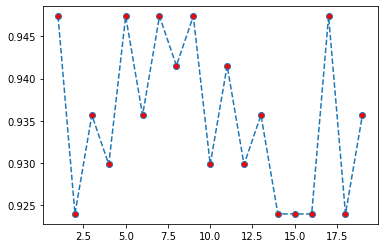

In [33]:
# Plot of K values and Scores
plt.plot(range(1,20),scores,marker='o',markerfacecolor='r',linestyle='--')

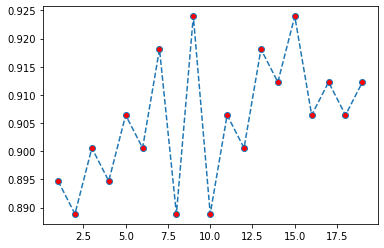

In [34]:

#Without Scaling
plt.plot(range(1,20),scores1,marker='o',markerfacecolor='r',linestyle='--')

#### Optimum k value is 7


In [35]:
# Optimum k value is 7
final_model = KNeighborsClassifier(n_neighbors=7,metric='euclidean')
final_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [36]:
# Without Scaling
final_model1 = KNeighborsClassifier(n_neighbors=9,metric='euclidean')
final_model1.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

#### Prediction on training data


In [37]:
# Prediction on training data
final_train_pred = final_model.predict(scaled_X_train)
final_train_pred

array(['B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M',
       'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B',
       'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M

In [38]:
#Without Scaling
final_train_pred1 = final_model1.predict(X_train)
final_train_pred1

array(['B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'M', 'B',
       'M', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M',
       'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B',
       'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B',
       'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M

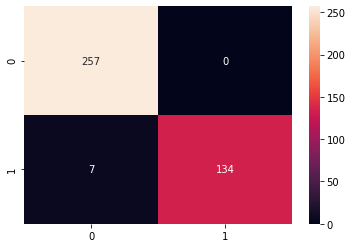

In [39]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_train,final_train_pred),annot=True,fmt='d')

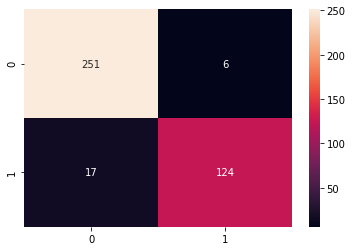

In [40]:
#Without Scaling
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_train,final_train_pred1),annot=True,fmt='d')

#### classification report


In [41]:

# classification report
# Precision--> PPV --> Out of the positive predicted values,how many truely positive
print(classification_report(y_train,final_train_pred))

              precision    recall  f1-score   support

           B       0.97      1.00      0.99       257
           M       1.00      0.95      0.97       141

    accuracy                           0.98       398
   macro avg       0.99      0.98      0.98       398
weighted avg       0.98      0.98      0.98       398



In [42]:
# Without Scaling
print(classification_report(y_train,final_train_pred1))

              precision    recall  f1-score   support

           B       0.94      0.98      0.96       257
           M       0.95      0.88      0.92       141

    accuracy                           0.94       398
   macro avg       0.95      0.93      0.94       398
weighted avg       0.94      0.94      0.94       398



#### Prediction on Test Data


In [43]:
# Prediction on Test Data
final_test_pred = final_model.predict(scaled_X_test) #y_test
final_test_pred

array(['B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'M',
       'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M',
       'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B',
       'M', 'B'], dtype=object)

In [44]:
final_test_pred1 = final_model1.predict(X_test) #y_test
final_test_pred1

array(['B', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M',
       'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M',
       'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M',
       'M', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M',
       'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'B',
       'M', 'B'], dtype=object)

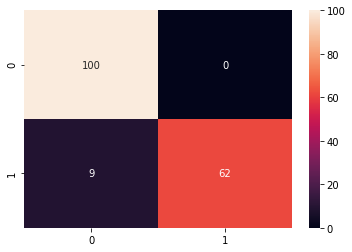

In [45]:
# Compare actual values of test data(y_test) and final_test_pred(model predicted values)
#Confusion_matrix(actualValues,predictedValues)
sns.heatmap(confusion_matrix(y_test,final_test_pred),annot=True,fmt='d')

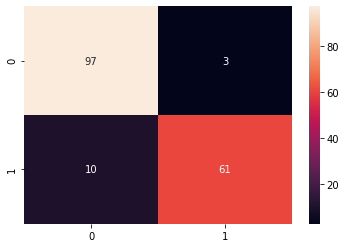

In [46]:
# Without Scaling
sns.heatmap(confusion_matrix(y_test,final_test_pred1),annot=True,fmt='d')

In [47]:
print(classification_report(y_test,final_test_pred))

              precision    recall  f1-score   support

           B       0.92      1.00      0.96       100
           M       1.00      0.87      0.93        71

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



In [48]:
#Without Scaling
print(classification_report(y_test,final_test_pred1))

              precision    recall  f1-score   support

           B       0.91      0.97      0.94       100
           M       0.95      0.86      0.90        71

    accuracy                           0.92       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.92      0.92       171

